d:\projects\Stable-Diffusion\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 50/50 [09:55<00:00, 11.91s/it]


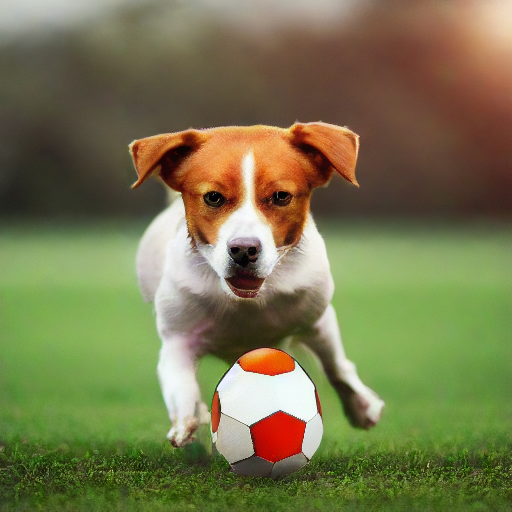

In [1]:
import model_loader
import pipeline
from PIL import Image
from transformers import CLIPTokenizer
import torch

import warnings
warnings.filterwarnings('ignore')


DEVICE = 'cpu'

tokenizer = CLIPTokenizer(r'D:\projects\Stable-Diffusion\data\tokenizer_vocab.json',
                          merges_file=r'D:\projects\Stable-Diffusion\data\tokenizer_merges.txt')
model_file = r'D:\projects\Stable-Diffusion\data\v1-5-pruned-emaonly.ckpt'
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

prompt = 'dog is playing football, high resolution, ultra detailed'
uncond_prompt = ''
do_cfg = True
cfg_scale = 7

input_image=None
strength = 0.9

sampler = 'ddpm'
num_inference_step = 50
seed = 42

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_step,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device='cpu',
    tokenizer=tokenizer
)


Image.fromarray(output_image).save('../images/image_1.jpg')
Image.fromarray(output_image)

100%|██████████| 50/50 [10:20<00:00, 12.42s/it]


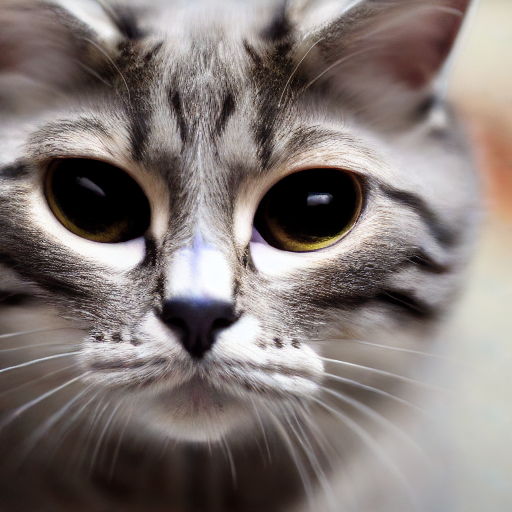

In [2]:
prompt = 'cat is watching you, ultra detailed, 8k resolution'

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_step,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device='cpu',
    tokenizer=tokenizer
)

Image.fromarray(output_image).save('../images/image_2.jpg')
Image.fromarray(output_image)